## About the Dataset

A categorical dataset to determine whether a user purchased a particular product

## Loading the Necessary libraries

In [1]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('../data/Social_Network_Ads.csv')
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 1
***
### Instructions
* Store the independent attributes i.e(`[Age,EstimatedSalary]`) in X and target variable i.e(`Purchased`) in y. 

In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 2
***
### Instructions

* Split `X` and `y` into `X_train,X_test,y_train,y_test` using train_test_split() function. Use `test_size = 0.25` and `random_state = 0`

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 3
***
### Instructions
* Using `StandardScaler`, use the fit_transform() method on `X_train` and `X_test` and save back to `X_train` and `X_test`.

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 4
***
### Instructions
* Initiate the SVC class and call it as `classifier` and pass the parameter as `kernel = 'linear'` and `random_state = 0`
* Fit the SVC classifier on `X_train` and `y_train`
* Use `classifier` to predict on `X_test` and save it as `y_pred`.

In [6]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 5
***
### Instructions
* Print Confusion Matrix and Accuracy Score

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Confusion Matrix: 
 [[66  2]
 [ 8 24]]
Accuracy Score:  0.9


### Here is a sample to visualize the training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


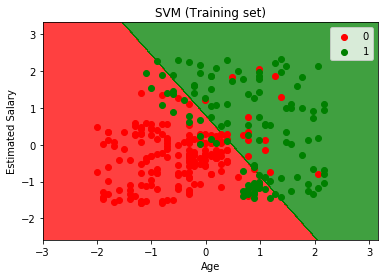

In [8]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 6
***
### Instructions
* Plot the graph for test set results(to plot refer the above graph)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


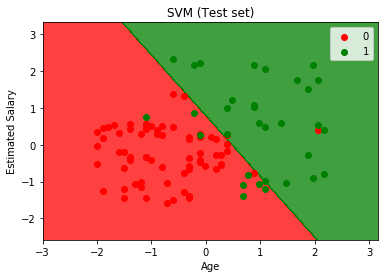

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### Observation: We can see due to the linear nature of this classifier the model made some incorrect predictions(i.e. 10 incorrect predictions as per the confusion matrix and graph). 

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 7
***
### Now let's try to use different kernel type and see if it makes any better predictions.
### Instructions
* Initiate the SVC class and call it as `classifier` and pass the parameter as `kernel = 'poly'` and `random_state = 0`
* Fit the SVC classifier on `X_train` and `y_train`
* Use `classifier` to predict on `X_test` and save it as `y_pred`.

In [10]:
# Kernel SVM
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 8
***
### Instructions
* Print Confusion Matrix and Accuracy Score

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Confusion Matrix: 
 [[67  1]
 [13 19]]
Accuracy Score:  0.86


<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 9
***
### Instructions
* Plot the graph for training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


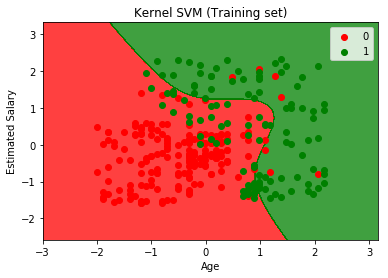

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 10
***
### Instructions
* Plot the graph for test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


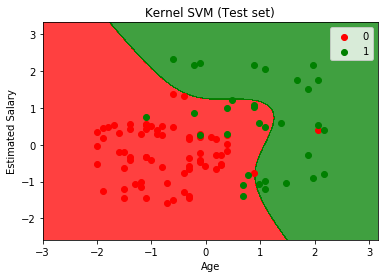

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Observation: The accuracy is reduced as you can see in the above graph the model has overfit the data

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 11
***
### Let's use rbf kernel and see if it makes any better predictions.
### Instructions
* Initiate the SVC class and call it as `classifier` and pass the parameter as `kernel = 'rbf'` and `random_state = 0`
* Fit the SVC classifier on `X_train` and `y_train`
* Use `classifier` to predict on `X_test` and save it as `y_pred`.

In [30]:
# Kernel SVM
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 12
***
### Instructions
* Print Confusion Matrix and Accuracy Score

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Confusion Matrix: 
 [[64  4]
 [ 3 29]]
Accuracy Score:  0.93


<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 13
***
### Instructions
* Plot the graph for training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


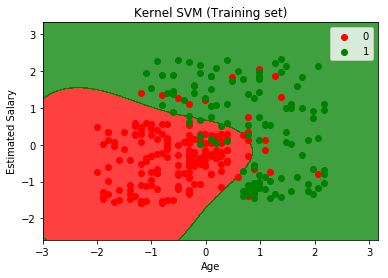

In [32]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<img src="../images/icons/ppt-icons.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Mini Challenge - 14
***
### Instructions
* Plot the graph for test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


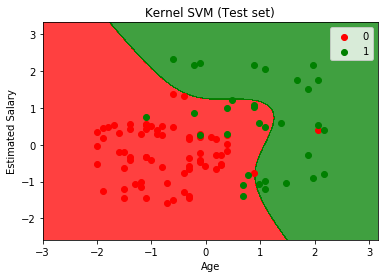

In [14]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### Observation:- As we can observe from the figure above, the classifier with kernel as rbf made better predictions with only 7 inocrrect predictions. Cheers!

<img src="../images/icons/quiz.png" alt="ppt-icons" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Support Vector Machine
***
Q1. What do you mean by generalization error in terms of the SVM?
```python
A) How far the hyperplane is from the support vectors
B) How accurately the SVM can predict outcomes for unseen data
C) The threshold amount of error in an SVM

Solution: B
```
Q2. When the C parameter is set to infinite, which of the following holds true?
```python
A) The optimal hyperplane if exists, will be the one that completely separates the data
B) The soft-margin classifier will separate the data
C) None of the above

Solution: A
```
Q3. What do you mean by a hard margin?
```python
A) The SVM allows very low error in classification
B) The SVM allows high amount of error in classification
C) None of the above

Solution: A
```
Q4. The minimum time complexity for training an SVM is O(n2). According to this fact, what sizes of datasets are not best suited for SVM’s?
```python
A) Large datasets
B) Small datasets
C) Medium sized datasets
D) Size does not matter

Solution: A
```
Q5. The effectiveness of an SVM depends upon:
```python
A) Selection of Kernel
B) Kernel Parameters
C) Soft Margin Parameter C
D) All of the above

Solution: D
```
Q6. Support vectors are the data points that lie closest to the decision surface.
```python
A) TRUE
B) FALSE

Solution: A
```
Q7. Suppose you are using RBF kernel in SVM with high Gamma value. What does this signify?
```python
A) The model would consider even far away points from hyperplane for modeling
B) The model would consider only the points close to the hyperplane for modeling
C) The model would not be affected by distance of points from hyperplane for modeling
D) None of the above

Solution: B
```